In [89]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [90]:
# import gmaps
# import gmaps.datasets

# google_key = open('../../../../Documents/google_api').read()
# gmaps.configure(api_key=google_key)

In [91]:
# data = gmaps.datasets.load_dataset('taxi_rides')
# m = gmaps.Map()
# m.add_layer(gmaps.Heatmap(data=data))


In [92]:
hospital_chosen_zip = pd.read_csv('../data/hospital_chosen_zip.csv', sep='|')
grouped_hospital = hospital_chosen_zip.groupby('zip')
group_names = grouped_hospital.groups.keys()

85020


<AxesSubplot:>

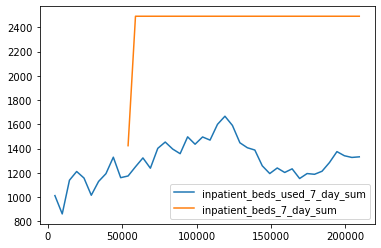

In [93]:
group_names = list(group_names)

g = random.choice(group_names)
print(g)
grouped_hospital.get_group(g)[['inpatient_beds_used_7_day_sum', 'inpatient_beds_7_day_sum']].plot()

''

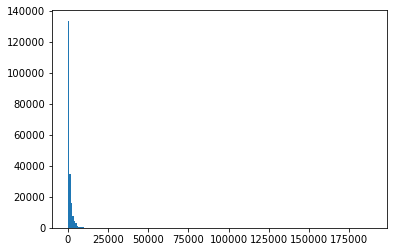

In [94]:
fig, ax = plt.subplots()
ax.hist(hospital_chosen_zip['all_adult_hospital_beds_7_day_sum'], bins=200)
;

In [107]:
hospital_gb_date = hospital_chosen_zip.groupby('collection_week')
hospital_gb_sum = hospital_gb_date.aggregate(np.sum)
# hospital_gb_sum

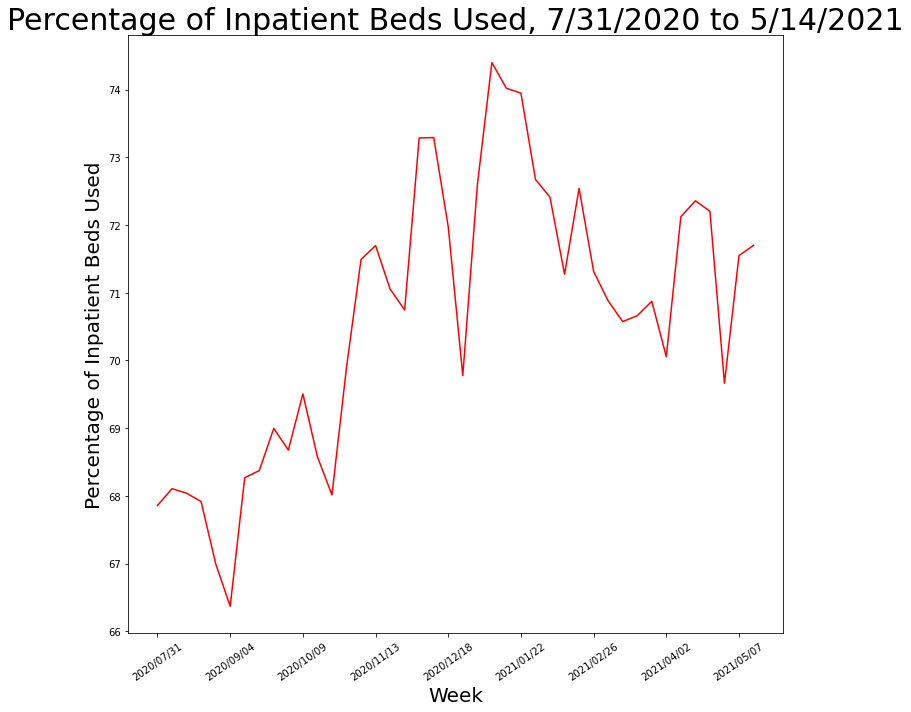

In [117]:
x = np.array(hospital_gb_sum.index)
y = (hospital_gb_sum['inpatient_beds_used_7_day_sum'] / hospital_gb_sum['inpatient_beds_7_day_sum']) * 100
figure_size = (10,10)

fig, ax = plt.subplots(figsize=figure_size)
ax.plot(x, y, color='red', fillstyle='full')
ax.set_title('Percentage of Inpatient Beds Used, 7/31/2020 to 5/14/2021', size=30)
ax.set_xlabel('Week', size=20)
ax.set_ylabel('Percentage of Inpatient Beds Used', size=20)
ax.set_xticks(x[::5])
plt.xticks(rotation='35');